# Exploratory Analysis

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('../data/prepared/data.pkl')

In [3]:
print(df.shape)
df.head()

(240, 7)


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,red,M
1,3042,0.000500,0.1542,16.60,0,red,M
2,2600,0.000300,0.1020,18.70,0,red,M
3,2800,0.000200,0.1600,16.65,0,red,M
4,1939,0.000138,0.1030,20.06,0,red,M


In [14]:
# inspect NULL values
df.isnull().values.any()

False

In [16]:
# class to predict
df['Star type'].value_counts()

0    40
1    40
2    40
3    40
4    40
5    40
Name: Star type, dtype: int64

## Find correlations to check for correlating columns

In [17]:
df.corr()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity(L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius(R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude(Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


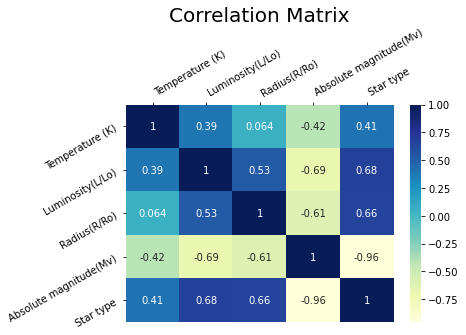

In [42]:
def plot_correlation(df):
    corr = df.corr()
    ax = plt.subplot()
    sns.heatmap(corr, annot=True, cmap="YlGnBu", ax=ax)
    ax.set_title('Correlation Matrix', fontsize=20)
    ax.xaxis.set_ticks_position('top') 
    ax.xaxis.set_ticklabels(corr.columns, rotation=30, horizontalalignment='left')
    ax.yaxis.set_ticklabels(corr.columns, rotation=30);
        
plot_correlation(df)

As we could expect, only the absolute magnitude and the type of star are highly negatively correlated. 

Recall that the absolute magnitude is a measure of the luminosity of a celestrial object on an inverse logarithmic astronomical magnitude scale. Therefore, the more luminous an object, the smaller the numerical value of its absolute magnitude. 

Now we understand that the brighter the star (or the higher the radiated electormagnatic power), the smaller the absolute magnitude and the larger the star is.

In [5]:
def frequency_plots(df, variable=str):
    for i, (name, group) in enumerate(df.groupby('Spectral Class')):
        fig = plt.gcf()
        fig.set_size_inches(20,5)
        fig.suptitle(variable, fontsize=24)
        ax = plt.subplot(1, 7, i+1)
        group[variable].hist()
        ax.set_title("{}".format(name))
        plt.ylabel("Frequency")
        plt.tight_layout();

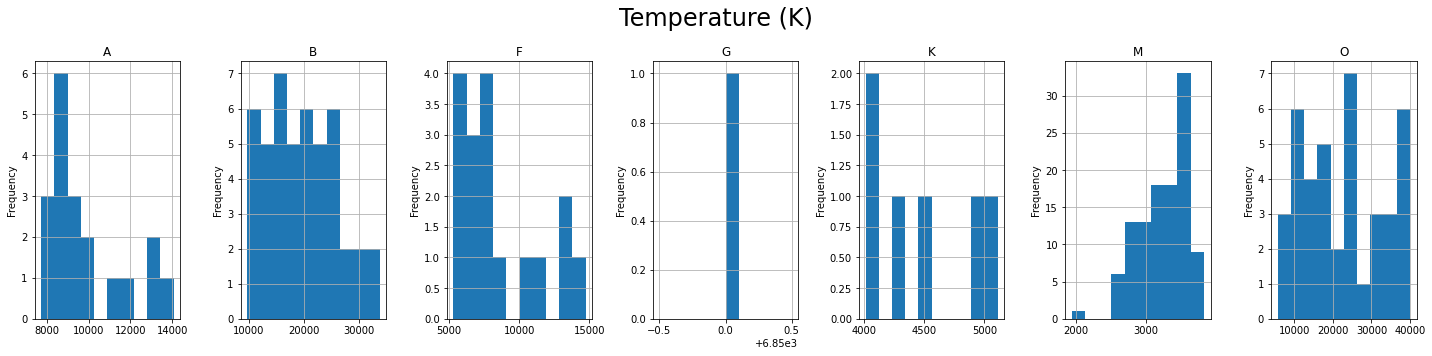

In [23]:
frequency_plots(df, variable='Temperature (K)')

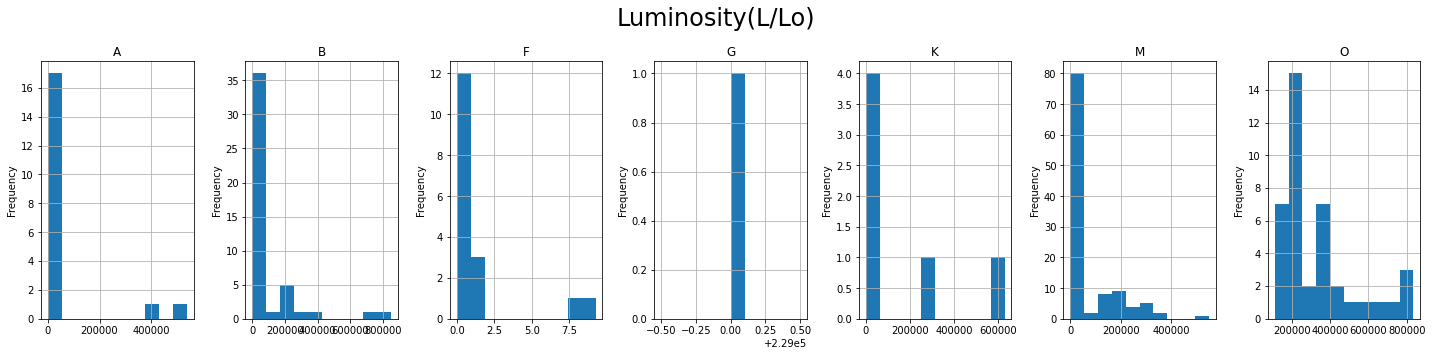

In [24]:
frequency_plots(df, variable='Luminosity(L/Lo)')

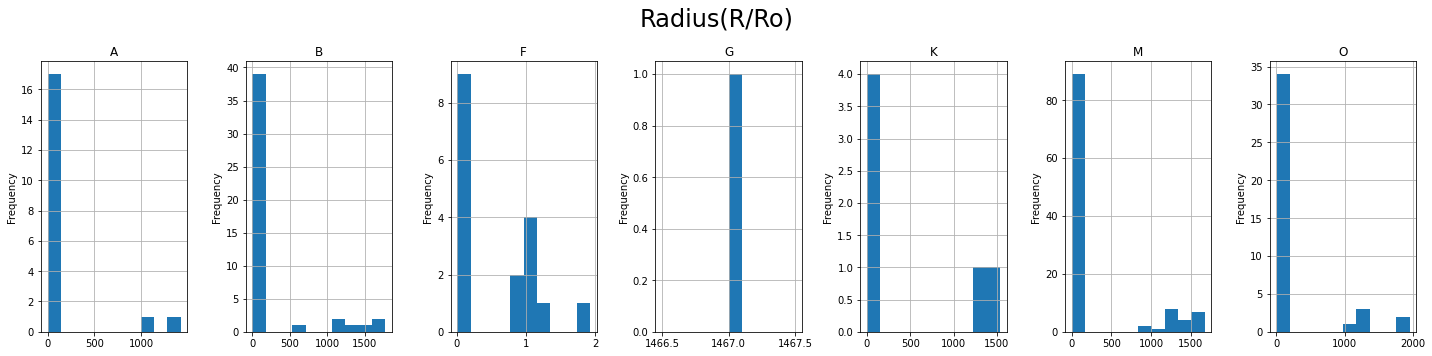

In [25]:
frequency_plots(df, variable='Radius(R/Ro)')

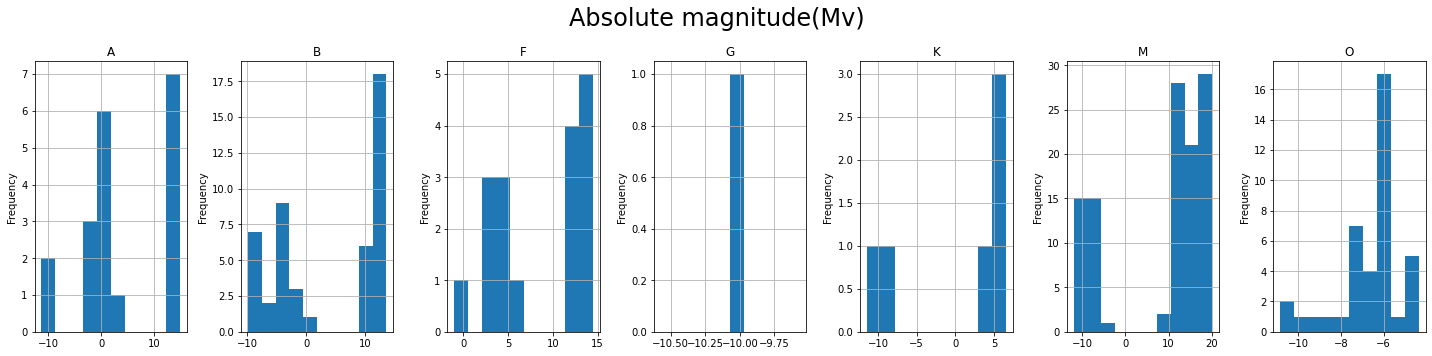

In [26]:
frequency_plots(df, variable='Absolute magnitude(Mv)')

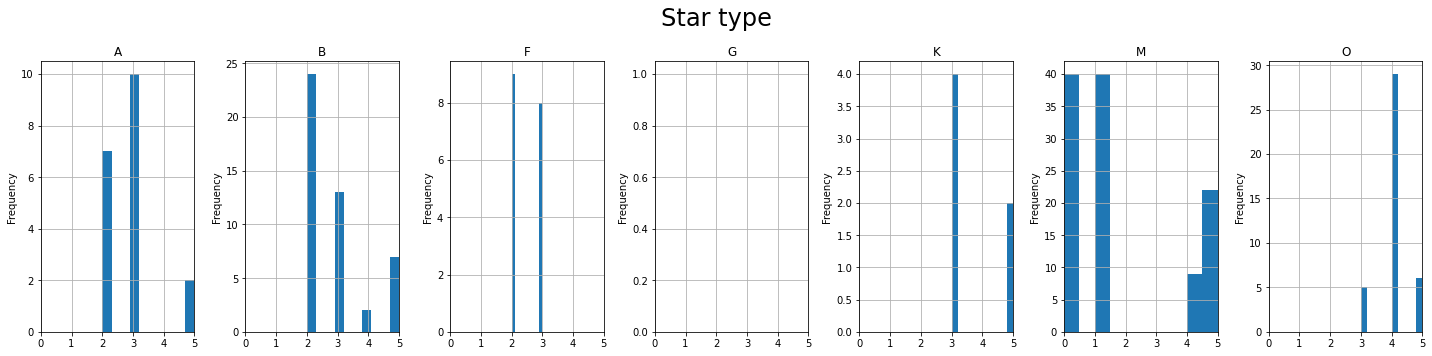

In [8]:
for i, (name, group) in enumerate(df.groupby('Spectral Class')):
        fig = plt.gcf()
        fig.set_size_inches(20,5)
        fig.suptitle('Star type', fontsize=24)
        ax = plt.subplot(1, 7, i+1)
        group['Star type'].hist()
        ax.set_title("{}".format(name))
        plt.ylabel("Frequency")
        plt.xlim(0,5) # add all available x-labels
        plt.tight_layout();

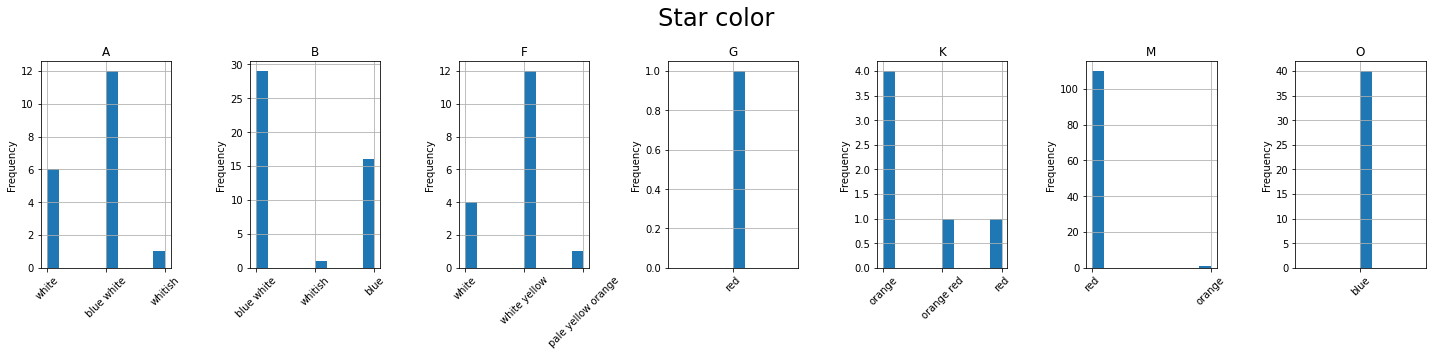

In [10]:
for i, (name, group) in enumerate(df.groupby('Spectral Class')):
        fig = plt.gcf()
        fig.set_size_inches(20,5)
        fig.suptitle('Star color', fontsize=24)
        ax = plt.subplot(1, 7, i+1)
        group['Star color'].hist()
        ax.set_title("{}".format(name))
        plt.ylabel("Frequency")
        plt.xticks(rotation=45) # rotate x-labels
        plt.tight_layout();

Total Counted Stars = 240
Yellow coloured point in the Main Sequence star band denotes our SUN


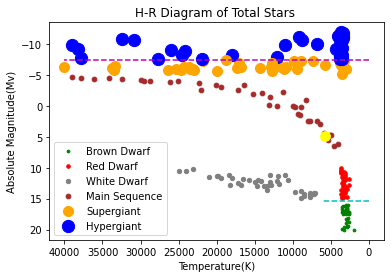

In [49]:
x = np.array(df.drop(['Star color','Spectral Class'],1))
y = np.array(df['Star type'], dtype ='float')
y.shape = (len(y1),1)
c1 = 0

for i in range(0,len(x)):
    if x[i][4] == 0:
        a = plt.scatter(x[i][0],x[i][3], s=30 , c='green', marker='.')
    elif x[i][4]== 1:
        b = plt.scatter(x[i][0],x[i][3], s=50 , c='red', marker='.')
    elif x[i][4]== 2:
        c = plt.scatter(x[i][0],x[i][3], s=75 , c='gray', marker='.')
    elif x[i][4]== 3:
        d = plt.scatter(x[i][0],x[i][3], s=90 , c='brown', marker='.')     
    elif x[i][4]== 4:
        e = plt.scatter(x[i][0],x[i][3], s=100 , c='orange', marker='o') 
    elif x[i][4]== 5:
        f = plt.scatter(x[i][0],x[i][3], s=150 , c='blue', marker='o')
    c1+=1


print("Total Counted Stars = {}".format(c1)) 
print("Yellow coloured point in the Main Sequence star band denotes our SUN")

plt.xlabel("Temperature(K)")
plt.ylabel("Absolute Magnitude(Mv)")
plt.title("H-R Diagram of Total Stars ")
plt.legend((a,b,c,d,e,f), ('Brown Dwarf','Red Dwarf','White Dwarf','Main Sequence','Supergiant','Hypergiant'))
m = np.linspace(0,40000,100)
n = (0*m) -7.5
plt.plot(m,n,'--m')
f = np.linspace(0,6000,100)
g = (0*f)+15.4
plt.plot(f,g,'--c')
plt.scatter(5778,4.83, s=95, c='yellow', marker = 'o' )
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()